# Python Plotting

* **Instructor**: Thomas Fiore 
* **E-mail**: tmfiore@umich.edu (for any questions)
* **Recommended Subsequent Tutorial on Kaggle:** [https://www.kaggle.com/residentmario/welcome-to-data-visualization](https://www.kaggle.com/residentmario/welcome-to-data-visualization)  
* **Acknowledgments:** I used several sources to prepare this document
    - Section 2 of the 2017 ICOS Big Data Summer Camp Module 6 - Introduction to Python for Data Analysis by Ronnie (Saerom) Lee and Jeff Lockhart [https://icosbigdatacamp.github.io/2017-summer-camp/](https://icosbigdatacamp.github.io/2017-summer-camp/)
    - The Kaggle Tutorial [https://www.kaggle.com/residentmario/welcome-to-data-visualization](https://www.kaggle.com/residentmario/welcome-to-data-visualization)  
    -  Chapter 4 of *Python Data Science Handbook* by Jake Vanderplas
    
    This notebook is self-contained, so it isn't necessary to consult the other resources first. 

## Overview of Topics
* Load a Built-In Data Set from `statsmodels`, about Travel Choices in Australia
* Quick Plotting from a `Pandas` DataFrame using `Pandas` 
* Quick Plotting from a `Pandas` DataFrame using `Seaborn`
* Basics of `Matplotlib` and Examples
* How to Save a Plot to a File for Drag and Drop into Your Paper or Presentation

## Load a Built-In Data Set from `statsmodels` on Travel Choices and Clean It Up

The Python module `statsmodels` contains several built-in data sets. They are listed at [https://www.statsmodels.org/dev/datasets/index.html#available-datasets](https://www.statsmodels.org/dev/datasets/index.html#available-datasets). 

Below we load the built-in data set Travel Mode Choice. 
To load a different built-in data set in your own work in the future, replace everywhere the current submodule name `modechoice` by the submodule name of your selection. 

In [1]:
import statsmodels.api as sm
modechoice_submodule = sm.datasets.modechoice
print(modechoice_submodule.DESCRLONG)
print(modechoice_submodule.NOTE)

modechoice = modechoice_submodule.load_pandas().data

The data, collected as part of a 1987 intercity mode choice
study, are a sub-sample of 210 non-business trips between Sydney, Canberra and
Melbourne in which the traveler chooses a mode from four alternatives (plane,
car, bus and train). The sample, 840 observations, is choice based with
over-sampling of the less popular modes (plane, train and bus) and under-sampling
of the more popular mode, car. The level of service data was derived from highway
and transport networks in Sydney, Melbourne, non-metropolitan N.S.W. and Victoria,
including the Australian Capital Territory.
::

    Number of observations: 840 Observations On 4 Modes for 210 Individuals.
    Number of variables: 8
    Variable name definitions::

        individual = 1 to 210
        mode =
            1 - air
            2 - train
            3 - bus
            4 - car
        choice =
            0 - no
            1 - yes
        ttme = terminal waiting time for plane, train and bus (minutes); 0
               for ca

Let's correct the data types. 

In [2]:
# after checking head(), I saw everything should be integers 
# so I cast entire data frame as integers
modechoice = modechoice.astype('int')
modechoice.head()

,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
0,1,1,0,69,59,100,70,35,1
1,1,2,0,34,31,372,71,35,1
2,1,3,0,35,25,417,70,35,1
3,1,4,1,0,10,180,30,35,1
4,2,1,0,64,58,68,68,30,2


Are there any missing values? 

In [3]:
# we see no missing values
modechoice.isnull().sum()

individual    0
mode          0
choice        0
ttme          0
invc          0
invt          0
gc            0
hinc          0
psize         0
dtype: int64

Let's recode the entries in the columns `mode` and `choice` to be words instead of numbers. This will make our plots more understanding later

In [4]:
# This replacement dictionary will be used in the replace command.
replacement_dictionary = {'mode':{1:'air',
                                  2:'train',
                                  3:'bus',
                                  4:'car'},
                          'choice':{0:'no',
                                    1:'yes'}}
# Do the replacement according to the dictionary. 
modechoice.replace(replacement_dictionary, inplace=True)
# Check that it worked. 
modechoice.head()

,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
0,1,air,no,69,59,100,70,35,1
1,1,train,no,34,31,372,71,35,1
2,1,bus,no,35,25,417,70,35,1
3,1,car,yes,0,10,180,30,35,1
4,2,air,no,64,58,68,68,30,2


In [5]:
modechoice.describe()

,individual,ttme,invc,invt,gc,hinc,psize
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,105.500000,34.589286,47.760714,486.165476,110.879762,34.547619,1.742857
std,60.657207,24.948608,32.371004,301.439107,47.978353,19.676044,1.010350
min,1.000000,0.000000,2.000000,63.000000,30.000000,2.000000,1.000000
25%,53.000000,0.750000,23.000000,234.000000,71.000000,20.000000,1.000000
50%,105.500000,35.000000,39.000000,397.000000,101.500000,34.500000,1.000000
75%,158.000000,53.000000,66.250000,795.500000,144.000000,50.000000,2.000000
max,210.000000,99.000000,180.000000,1440.000000,269.000000,72.000000,6.000000


## Pandas Plotting Directly from a Pandas Data Frame, without Fully Interacting with `matplotlib`

The `pandas` module is equipped with some `matplotlib` functionality under the hood. Let's first learn to plot directly from a pandas dataframe *without* explicitly calling `matplotlib`. This way `.plot` is a method for a dataframe so we call `df.plot...` on a dataframe `df`. Then we can use further methods on the resulting object:
* `.set_title("title")`
* `.set_xlabel("xlabel")`
* `.set_ylabel("ylabel")`.

Let's load the `pandas` module. We don't need to load `matplotlib`. 

In [6]:
import pandas as pd

### Plotting ONE Variable Using Pandas Using `.plot.graphtype()`

For plotting one variable in pandas, the syntax is `dataframename['columnname'].plot.graphtype()`.

#### Pandas Histogram for a Continous Variable Using `.plot.hist()`

Text(0.5, 0, 'Waiting Time in Terminal in Minutes')

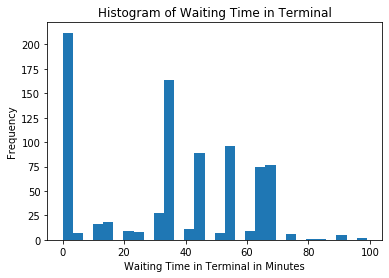

In [7]:
# histogram of waiting time in terminal
mygraph = modechoice['ttme'].plot.hist(bins=30)

mygraph.set_title("Histogram of Waiting Time in Terminal")
mygraph.set_xlabel('Waiting Time in Terminal in Minutes')

#### Pandas Bar Chart for the Counts of a Categorical Variable Using `.value_counts().plot.bar()`

The method `.value_counts()` tells us the frequency of a categorical variable when applied to a column of a dataframe. 

In [8]:
modechoice['choice'].value_counts()     

no     630
yes    210
Name: choice, dtype: int64

Combining the method `.value_counts()` with the method `.plot.bar()` gives us a bar chart of the counts of a categorical variable. 

Text(0.5, 0, 'Choice')

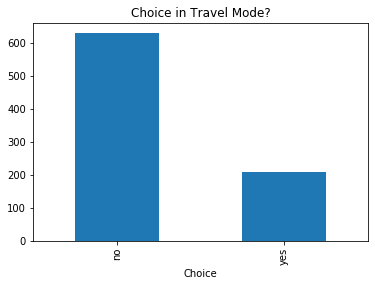

In [9]:
mygraph = modechoice['choice'].value_counts().plot.bar()

mygraph.set_title("Choice in Travel Mode?")
mygraph.set_xlabel("Choice")

## Plotting TWO Variables Using Pandas using `.plot.graphname()`

For plotting two variables in pandas, the syntax is `dataframename.plot.graphtype()`.

#### Pandas Scatterplot for Two Continuous Variables Using `.plot.scatter(x= , y= )`

Text(0, 0.5, 'In-Vehicle Cost in Dollars')

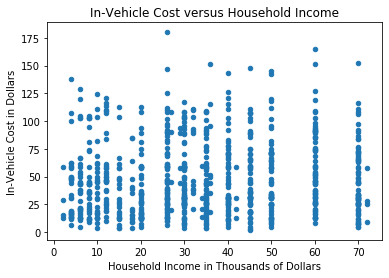

In [10]:
# scatter plot of in-vehicle cost versus household income
mygraph = modechoice.plot.scatter(x='hinc', y='invc')

mygraph.set_title("In-Vehicle Cost versus Household Income")
mygraph.set_xlabel("Household Income in Thousands of Dollars")
mygraph.set_ylabel("In-Vehicle Cost in Dollars")

#### Pandas Line Graph For a List of Unique Numerical $x$-Values with any Num. $y$-Values: `.plot.line(x= , y= )`
#### and 
#### Pandas Bar Graph for Same with: `.plot.bar(x=, y=`)

In [11]:
# define a small data frame of xy-pairs for illustration
df = pd.DataFrame( {'x':[1,2,3,4],
                   'y':[10,4,7,1]} )
# look at it
df

,x,y
0,1,10
1,2,4
2,3,7
3,4,1


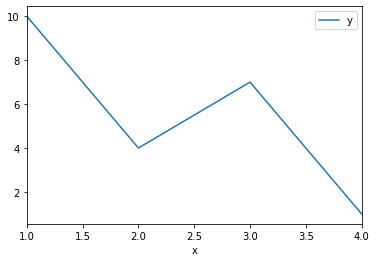

In [12]:
# make the line plot
df.plot.line(x='x',y='y')

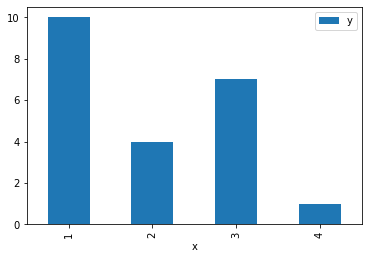

In [13]:
# make the bar graph for the same data
df.plot.bar(x='x',y='y')

When x is not specified in `df.plot.line(x= ,y= )` or `df.plot.bar(x= ,y= )`the method takes the row names (i.e. "index") for x. This is useful in conjunction with `groupby` as in the following example. 

#### Pandas Line Graph and Bar Graph for a Grouped Descriptive Statistic (Grouped by a Numerical Variable), Using `.plot.line()` and `.plot.bar()`

In [14]:
# let's form the data frame of column means, grouped by travel group size
# notice the row names (i.e. "indices") are the group sizes 
df = modechoice.groupby(by='psize').mean()
df 

,individual,ttme,invc,invt,gc,hinc
psize,,,,,,
1,106.350877,32.015351,51.043860,483.396930,104.956140,31.824561
2,94.896552,37.267241,45.965517,481.275862,118.620690,35.672414
3,127.050000,37.387500,43.637500,507.162500,120.675000,40.450000
4,109.133333,38.933333,35.916667,462.350000,106.033333,38.933333
5,90.500000,40.250000,48.750000,759.500000,164.125000,60.000000
6,168.000000,40.250000,35.750000,476.000000,107.500000,45.000000


Throughout this subsection, we must use `df` to plot, rather than the original data frame `modechoice`.

Text(0, 0.5, 'Mean In-Vehicle Cost in Dollars')

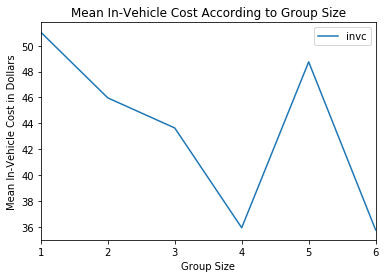

In [15]:
# make the line plot of mean costs versus group size

# remember in df the entries in a column are means of that variable by group
# so column 'invc' in df has entries means of 'invc' by group
mygraph = df.plot.line(y='invc') # x missing, so by default x = rownames

mygraph.set_title('Mean In-Vehicle Cost According to Group Size')
mygraph.set_xlabel('Group Size')
mygraph.set_ylabel('Mean In-Vehicle Cost in Dollars')

Of course, be careful, the y-axis begins around 36, so the visualized proportions may be misleading. Let's add `.set_ylim(bottom= , top= )` to gain more perspective for the proportions . 

(0, 53)

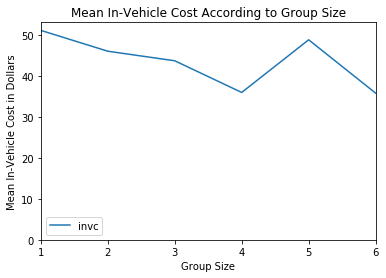

In [16]:
# make the line plot with full vertical limits
# first repeat as before
mygraph = df.plot.line(y='invc') # x missing, so by default x = rownames

mygraph.set_title('Mean In-Vehicle Cost According to Group Size')
mygraph.set_xlabel('Group Size')
mygraph.set_ylabel('Mean In-Vehicle Cost in Dollars')
# but now additionally we set the vertical limits
mygraph.set_ylim(bottom=0,top=53) 

Text(0, 0.5, 'Mean In-Vehicle Cost in Dollars')

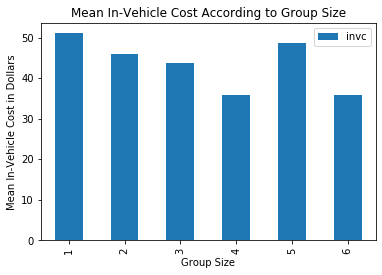

In [17]:
# make the bar plot for the same data
mygraph = df.plot.bar(y='invc') # x missing, so by default x = rownames

mygraph.set_title('Mean In-Vehicle Cost According to Group Size')
mygraph.set_xlabel('Group Size')
mygraph.set_ylabel('Mean In-Vehicle Cost in Dollars')

It appears that, on average, the in-vehicle cost decreases as the group size increases, except for group size 5. Group size 5 should be further investigated.

Let's add **error bars** to the bar graph of group averages. For that we need the group standard deviations and then put them into `.plot.bar(yerr= )` from before, applied to the grouped means data frame `df`, as before.

Text(0, 0.5, 'Mean In-Vehicle Cost in Dollars')

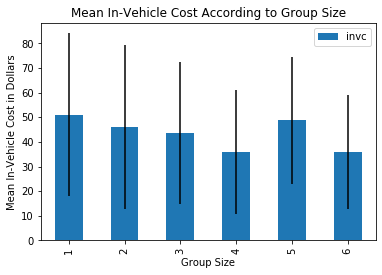

In [18]:
# store the group standard deviations of all numerical variables into df2
df2 = modechoice.groupby(by="psize").std()
# the group standard deviations of invc is df2['invc']

# now repeat the bar graph from before with one addition:
# yerr=df2['invc'] in first call
mygraph = df.plot.bar(y='invc',yerr=df2['invc']) # x missing, so by default x = rownames

mygraph.set_title('Mean In-Vehicle Cost According to Group Size')
mygraph.set_xlabel('Group Size')
mygraph.set_ylabel('Mean In-Vehicle Cost in Dollars')

#### Pandas Side-by-Side Boxplots of a Numerical Var. Grouped by a Factor Using `.boxplot(column= , by= )` 

For the side-by-side boxplots, we do **not** need to first use `groupby`. Instead, the method `.boxplot()` groups for us, and we apply it directly to the original dataframe `modechoice`. 

Text(0, 0.5, 'In-Vehicle Cost in Dollars')

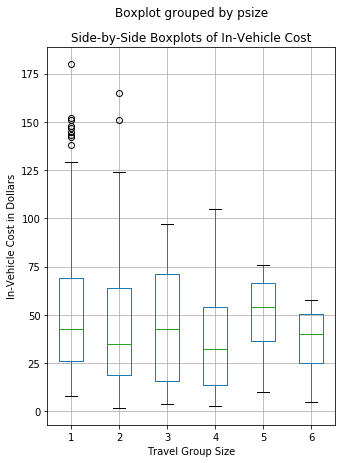

In [19]:
mygraph = modechoice.boxplot(column='invc', by='psize', figsize=(5,7))

mygraph.set_title('Side-by-Side Boxplots of In-Vehicle Cost')
mygraph.set_xlabel('Travel Group Size')
mygraph.set_ylabel('In-Vehicle Cost in Dollars')

## `Seaborn` Plotting Directly from a Pandas Data Frame

`Seaborn` is a python module for data visualization, based on `matplotlib`. 
For great examples of what `Seaborn` can do, see [http://seaborn.pydata.org/examples/index.html](http://seaborn.pydata.org/examples/index.html). The `Seaborn` homepage is
[http://seaborn.pydata.org/index.html](http://seaborn.pydata.org/index.html). Let's do some `Searborn` plots on the current data set.

In [20]:
import pandas as pd  # already called earlier, but included for completeness
import seaborn as sns

#### Seaborn Probability Histogram with Kernel Density Estimate Using `sns.distplot( df['colname'] )`

Text(0.5, 0, 'Waiting Time in Terminal in Minutes')

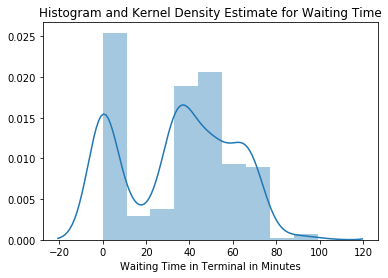

In [21]:
mygraph=sns.distplot(modechoice['ttme'])

mygraph.set_title("Histogram and Kernel Density Estimate for Waiting Time")
mygraph.set_xlabel("Waiting Time in Terminal in Minutes")

#### Two Superimposed Seaborn Probability Histograms with Kernel Density Estimate 
#### Using Twice `sns.distplot( df['colname'] )`

In this kind of graph, it is useful for the two variables to have the same units. 

Text(0.5, 0, 'Wating Time in Terminal and Travel Time in Minutes')

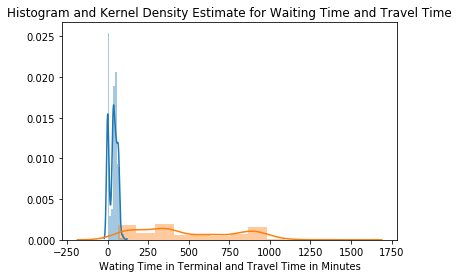

In [22]:
# use .distplot() twice, once for each variable
mygraph = sns.distplot(modechoice['ttme'])
sns.distplot(modechoice['invt'])

mygraph.set_title("Histogram and Kernel Density Estimate for Waiting Time and Travel Time")
mygraph.set_xlabel("Wating Time in Terminal and Travel Time in Minutes")

#### Seaborn Pairplot of a All Numerical Variables Except One, Color Coded by a Categorical Variable Using `sns.pairplot( df, hue='colname')`

In [23]:
# remove 'individual' from list of column names
colnames_wo_ind = modechoice.columns.difference(['individual'])

# remove column 'individual' to get new dataframe
modechoice_wo_individual = modechoice[ colnames_wo_ind  ]

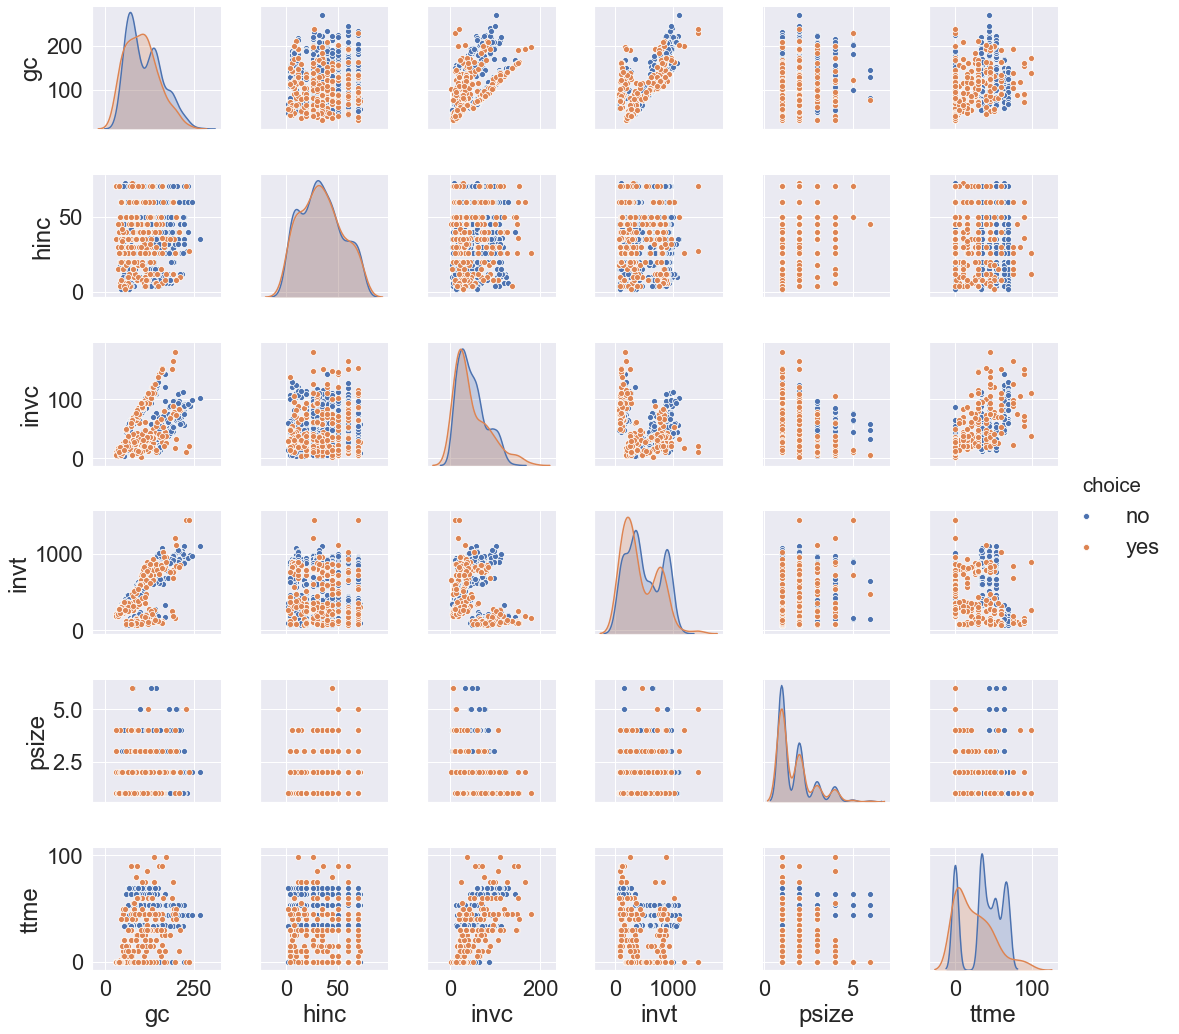

In [24]:
# make a pairplot of all numerical variables except 'individual'
# color coded by 'choice'
sns.set(font_scale=2)
sns.pairplot(modechoice_wo_individual, hue='choice')

#### Seaborn Faceted Histogram: Histogram of One Numerical Variable Factored by Two Categorical Variables Using `sns.FacetGrid( df, row='colname1',  col='colname2', margin_titles=True)` 

Seaborn's `FacitGrid` makes many kinds of facets. Below we only show a faceted histogram on the current data set, but you can see many more examples by scrolling down on the official page
[http://seaborn.pydata.org/generated/seaborn.FacetGrid.html](http://seaborn.pydata.org/generated/seaborn.FacetGrid.html). The official `FacetGrid` tutorial is available at 
[http://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial](http://seaborn.pydata.org/tutorial/axis_grids.html#grid-tutorial).

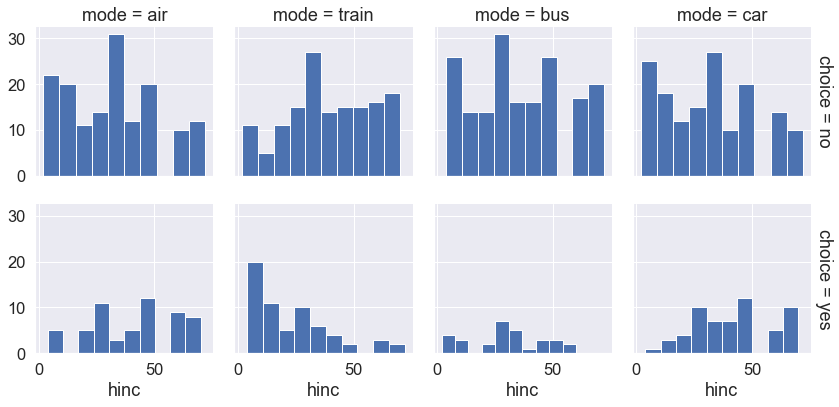

In [25]:
import matplotlib.pyplot as plt # need this for plt.hist call

sns.set(font_scale=1.5)
grid = sns.FacetGrid(modechoice, row='choice',col='mode', margin_titles=True)
grid.map(plt.hist,'hinc')

#### Seaborn Side-by-Side Boxplot with Two Factors using 
#### `sns.catplot("firstfactor", "continousvariable", "secondfactor", data= , kind="box")`

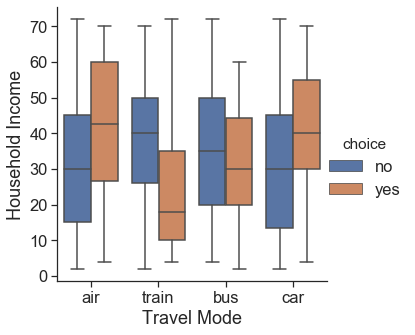

In [26]:
with sns.axes_style(style='ticks'):
    mygraph=sns.catplot("mode","hinc","choice",data=modechoice,kind="box")
    mygraph.set_axis_labels("Travel Mode","Household Income")
    
    # unfortunately .set_xlabel("") does not work here!

#### Joint Distribution Plot with a Linear Regression 
#### `sns.jointplot('xvarname','yvarname',data=df, kind='reg')`

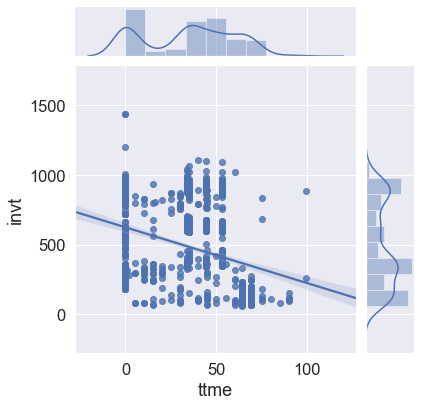

In [27]:
sns.jointplot('ttme','invt',data=modechoice, kind='reg')

## Basics of `Matplotlib`

The `pandas` plotting and `Seaborn` plotting we learned above actually use `matplotlib` under the hood. Even though `pandas` plotting and `Searborn` plotting are easy to use, it is still useful to learn `matplotlib` in order to adjust the plot (Vanderplas, *Python Data Science Handbook*, page 218). We also use `matplotlib` 

For this section on `matplotlib` and the previous on `Seaborn`, I used Chapter 4 of *Python Data Science Handbook* by Jake Vanderplas, so there is some similarity. 

### Confusing Point 1: A Graph is called an "`axes`" [sic!] and is stored in a variable `ax` by convention

Above I stored my graphs in a variable called `mygraph` each time, for pedagogical understandibility. However, in `matplotlib` it is convention to store graphs in a variable called `ax`! Then a plot is called an "`axes`" instead of `graph`. This is because to create a graph in `matplotlib` we first create an empty coordinate plane (i.e. two axes) and store it to `ax`. Then the object `ax` is successivly modifed to add the usual elements that make up a plot (dots, lines, bars, curves, etc.). So the term "`axes`" actually means graph!

Strictly speaking, everywhere I wrote `mygraph` in the previous examples, I should have written `ax`. 

### Confusing Point 2: To make a plot, you first need to open a figure

There is a difference between a plot and a figure. First you need to open a figure, and then make a plot in the figure. 

### Confusing Point 3: To automatically display plots in a notebook, call  `%matplotlib inline` before loading modules,  or use `plt.show()` each time at the end

### Confusing Point 4: `matplotlib` uses TWO command styles

**1. Object Oriented Command Style:** This is like what we have been using so far. We create an empty coordinate plane bject `mygraph` (or `ax`) and then apply methods to it, such as `.plot...()` and `.set_ylabel("yname")`. We continue to use the object oriented command style.

**2. MatLab Command Style:** Let axes be created in the background automatically, and directly plot with `plt.plot()`, and update the current plot with further functions, for instance `plt.ylabel("yname")` (NB: Here `plt` is *not* a plot object to which we apply methods! Instead, here `plt` is the standard abbreviation for the submodule `pyplot` used for calling functions from the submodule!) We will not use the MatLab command style. 

## Examples of `Matplotlib`

First use the magic command to show inline, and then load the module and submodule. 

In [28]:
# to plot inline in Jupyter Notebook, this does not load anything
%matplotlib inline 

# load matplotplib and submodule
import matplotlib as mpl 
import matplotlib.pyplot as plt  

#### Create Empty Axes Using `plt.axes` and Store to `mygraph` 

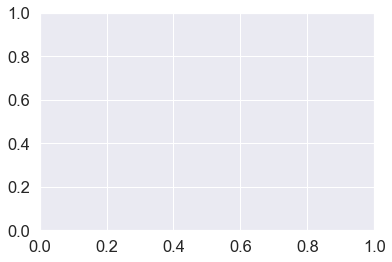

In [29]:
# first open a figure stored in a variable
myfigure = plt.figure() 
# create empty axes in figure
mygraph = plt.axes()

#### Plot Two Functions in One Empty Axes Using Method `.plot()` Twice

Let's plot cosine and sine in one plane.

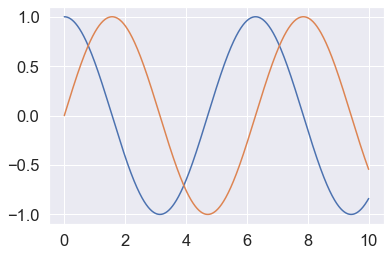

In [30]:
# need numpy for np.linspace()
# to create array of inputs to cos and sin
import numpy as np 

# first open a figure stored in a variable
myfigure = plt.figure() 
# create empty axes in figure
mygraph = plt.axes()

# create sequence of 1000 numbers evenly spaced 
# between 0 and 10
x=np.linspace(0,10,1000)

# add to the empty axes the linear connection of the dots
# (xn,cos(xn))
mygraph.plot(x, np.cos(x))

# add to the graph the linear connection of the dots
# (xn,sin(xn))
mygraph.plot(x,np.sin(x))

#### Make a Figure of an Array of Empty Axes that Share Axes
#### ` plt.subplots(numberofrows, numberofcols, sharex='col', sharey='row')`

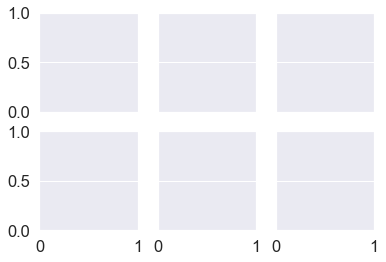

In [31]:
# use tuple assignment to simultaneously
# create the figure and array of axes,
# indexing is 0-indexing
(myfigure, mygraph) = plt.subplots(2, 3, sharex='col', sharey='row')

#### Plot Functions in a Figure of an Array of Empty Axes that Share Axes

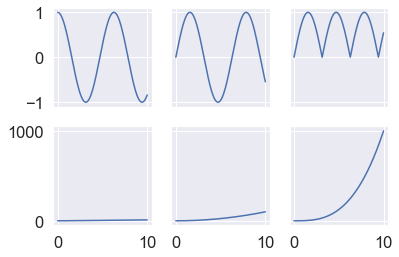

In [32]:
# use tuple assignment to simultaneously
# create the figure and array of axes,
# indexing is 0-indexing
(myfigure, mygraph) = plt.subplots(2, 3, sharex='col', sharey='row')

# create sequence of 1000 numbers evenly spaced 
# between 0 and 10
x=np.linspace(0,10,1000)

# index into array mygraph do method .plot() 
# to each
mygraph[0,0].plot(x, np.cos(x))
mygraph[0,1].plot(x, np.sin(x))
mygraph[0,2].plot(x, np.abs(np.sin(x)))

mygraph[1,0].plot(x,x)
mygraph[1,1].plot(x,x**2)
mygraph[1,2].plot(x,x**3)

#### Plot Seaborn Probability Histograms in a Figure of an Array of Empty Axes that Share Axes,
#### Using Argument `ax=` in `sns.distplot()`

Unfortunately, the above grid syntax must be slightly altered for Seaborn. Instead of applying a method to each entry of the array `mygraph`, we put an extra argument `ax=` inside of `sns.distplot()`. 

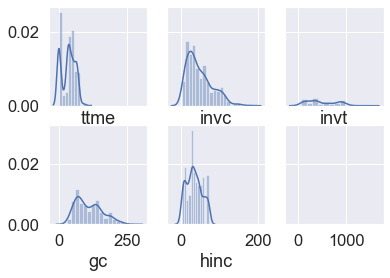

In [33]:
# use tuple assignment to simultaneously
# create the figure and array of axes,
# indexing is 0-indexing
(myfigure, mygraph) = plt.subplots(2, 3, sharex='col', sharey='row')

# index into array mygraph do method .plot() 
# to each
sns.distplot(modechoice['ttme'], ax=mygraph[0,0])
sns.distplot(modechoice['invc'], ax=mygraph[0,1])
sns.distplot(modechoice['invt'], ax=mygraph[0,2])

sns.distplot(modechoice['gc'], ax=mygraph[1,0])
sns.distplot(modechoice['hinc'], ax=mygraph[1,1])
# leave last one blank without error

## How to Save a Plot to a File for Drag and Drop into Your Paper or Presentation using `.savefig('filname.extension')`

Even when just using pandas to make a graph, you still need `matplotlib` to make the graph in a figure and save the figure to a file. 

The following code creates a figure file in the same folder as the notebook (or script). The type of figure file is inferred from your given extension in `.savefig()`. You can then drag and drop the resulting `jpg` or `png` file into Word, or PowerPoint, or GoogleDoc, or GoogleSlide, and resize it there.    

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

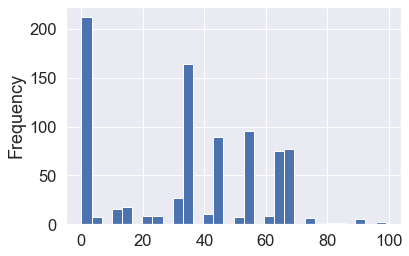

In [35]:
# first open a figure
myfigure = plt.figure()   
# make the graph in the figure
# (we rehearsed this one)
mygraph = modechoice['ttme'].plot.hist(bins=30)
# save the figure to a file
myfigure.savefig('MyFirstPythonFigure.jpg', bbox_inches='tight')
# the option " bbox_inches='tight' " is needed so the axis label
# is not cut off

## Showcase: How can `Matplotlib` and Python be Used in Science and Education?   

Abigail Azari, Michael Liemohn, and Brian Swiger recently developed the 2018 and 2019 class 

* Data Visualization and Statistics in Geosciences (Climate and Space Science 405 at the University of Michigan)

Check out the 2019 version:

* [https://github.com/astro-abby/data_vis_statistics_geosciences](https://github.com/astro-abby/data_vis_statistics_geosciences)